# Models comparison

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

from keras.layers import Dropout
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from keras import backend as K
from keras.optimizers import Adam
from sklearn.model_selection import GroupKFold
from tqdm import tqdm
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [ ]:
# data1 = pd.read_csv("/home/rcf-proj2/mf/lichendu/ReadyforDL_3wYear05_new.csv")
# data2 = pd.read_csv("/home/rcf-proj2/mf/lichendu/Ready_3w_method2.csv")

In [2]:
#data1 first method
data1 = pd.read_csv("//Users//dulichen//PycharmProjects//cisi567//venv//lib//PA_copy//thesis//ReadyforDL_3wYear05_new.csv")
#data2 second method
data2 = pd.read_csv("//Users//dulichen//PycharmProjects//cisi567//venv//lib//PA_copy//thesis//Ready_3w_method2.csv")

# Split data

In [12]:
#Random sampling
#method1
sample=data1
X, y = sample.drop(columns=["DUEXTTAU_7"]).values, sample["DUEXTTAU_7"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=2020)

In [13]:
X_train.shape #(24772356, 17)
X_test.shape #(8257452, 17)
y_train.shape #(24772356,)
y_test.shape #(8257452,)

(8257452,)

In [53]:
X_train[0:5,:]

array([[0.61591439, 0.83301934, 0.33820006, 0.38028115, 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.5927625 , 0.03538218, 0.41152122, 0.29123181, 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.80884222, 0.99546478, 0.34684417, 0.74780515, 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.93306402, 0.90162268, 0.2539207 , 0.54193748, 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.04135915, 0.9841099 , 0.38201969, 0.153043

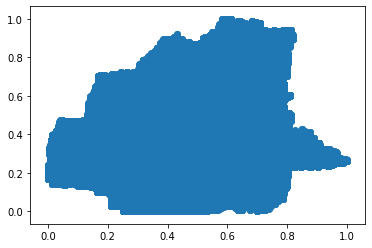

In [14]:
plt.scatter(X_train[:,2],y_train)

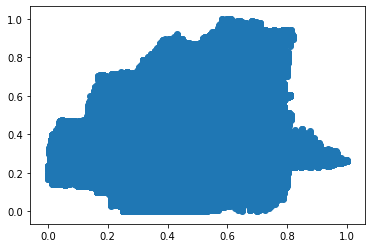

In [15]:
plt.scatter(X_test[:,2],y_test)

In [16]:
#Random sampling
#method1
sample2=data2
X2, y2 = sample2.drop(columns=["DUEXTTAU_7"]).values, sample2["DUEXTTAU_7"].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25,random_state=2020)

In [17]:
X_train2.shape #(24772356, 17)
X_test2.shape #(8257452, 17)
y_train2.shape #(24772356,)
y_test2.shape #(8257452,)

(8257452,)

In [55]:
X_train2[0:5,:]

array([[ 0.30920283,  1.08213105, -0.89421062,  0.64842881,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.22852362, -1.69168819, -0.27398817, -0.03902729,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.98151368,  1.64704241, -0.82109026,  3.48569423,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.41439923,  1.32070225, -1.6071283 ,  1.89640695,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        

In [6]:
#Leave one day out
def datasplit(data):
    #input: df
    #output: df
    testset=data[data['Thursday']==1]
    trainset=data[data['Thursday']==0]
    train_data,train_label=trainset.drop(columns=["DUEXTTAU_7"]).values,trainset["DUEXTTAU_7"].values
    test_data,test_label=testset.drop(columns=["DUEXTTAU_7"]).values,testset["DUEXTTAU_7"].values
    return train_data,train_label,test_data,test_label

In [7]:
#method 1
train_data,train_label,test_data,test_label=datasplit(data1)

In [5]:
train_data.shape #(28311264, 17)
train_label.shape #(28311264,)
test_data.shape #(4718544, 17)
test_label.shape #(4718544,)

(4718544,)

In [7]:
train_data[0:5,:]

array([[0.        , 0.        , 0.70942692, 0.31717216, 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00148449, 0.70942692, 0.31726794, 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00296808, 0.70942692, 0.31724112, 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00445076, 0.70942692, 0.31712619, 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.00593253, 0.70942692, 0.316907

In [8]:
#method 2
train_data2,train_label2,test_data2,test_label2=datasplit(data2)

In [7]:
train_data2.shape #(28311264, 17)
train_label2.shape #(28311264,)
test_data2.shape #(4718544, 17)
test_label2.shape #(4718544,)

(4718544,)

In [10]:
train_data2[0:5,:]

array([[-1.83712274, -1.81473131,  2.24599099,  0.16123081,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.83712274, -1.80956891,  2.24599099,  0.16197021,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.83712274, -1.80440968,  2.24599099,  0.16176317,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.83712274, -1.7992536 ,  2.24599099,  0.16087593,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        

# Linear regression

In [48]:
# Linear regression:
# RS:method1
reg = LinearRegression()

reg_rs1 = reg.fit(X_train, y_train)
ypred_reg_rs1=reg_rs1.predict(X_test) 
R2_reg_rs1=r2_score(y_test,ypred_reg_rs1)

In [49]:
R2_reg_rs1

0.4144271869436629

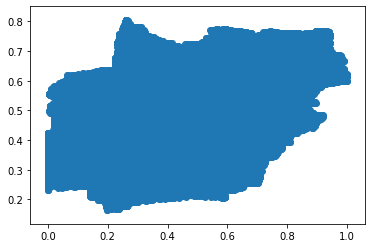

In [50]:
plt.scatter(y_test,ypred_reg_rs1)

In [58]:
# Linear regression:
# RS:method2
reg = LinearRegression()

reg_rs2 = reg.fit(X_train2, y_train2)
ypred_reg_rs2=reg_rs2.predict(X_test2) 
R2_reg_rs2=r2_score(y_test2,ypred_reg_rs2)

In [59]:
R2_reg_rs2

0.4144272018450915

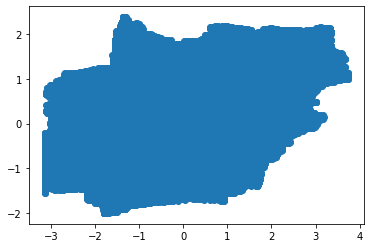

In [60]:
plt.scatter(y_test2,ypred_reg_rs2)

In [15]:
# Linear regression:
# Leave one day out: method1

reg_loo1 = reg.fit(train_data, train_label)
ypred_reg_loo1=reg_loo1.predict(test_data) 
R2_reg_loo1=r2_score(test_label,ypred_reg_loo1)

In [16]:
R2_reg_loo1

-4.601246435053931e+19

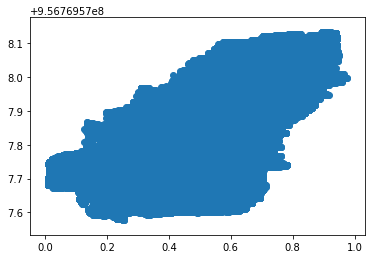

In [23]:
plt.scatter(test_label,ypred_reg_loo1)

In [18]:
reg = LinearRegression()
reg_loo1 = reg.fit(train_data, train_label)
trainpred_reg_loo1=reg_loo1.predict(train_data)

In [19]:
R2_reg_train1=r2_score(train_label,trainpred_reg_loo1)
R2_reg_train1

0.4017107647175754

In [1]:
plt.scatter(train_label,R2_reg_train1)

NameError: name 'plt' is not defined

In [19]:
# Linear regression:
# Leave one day out: method2

reg_loo2 = reg.fit(train_data2, train_label2)
ypred_reg_loo2=reg_loo2.predict(test_data2) 
R2_reg_loo2=r2_score(test_label,ypred_reg_loo2)

In [20]:
R2_reg_loo2

-1.8129962079170051e+25

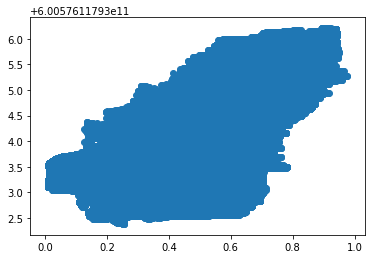

In [24]:
plt.scatter(test_label,ypred_reg_loo2)

# Random Forest

In [89]:
#random forest
#RS：method1
rf = RandomForestRegressor()

rf_rs1 = rf.fit(X_train, y_train)
ypred_rf_rs1=rf_rs1.predict(X_test)  
R2_rf_rs1=r2_score(y_test,ypred_rf_rs1)

/Users/dulichen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [90]:
R2_rf_rs1

0.998955560348711

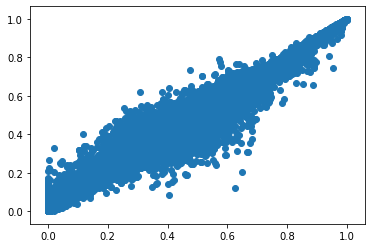

In [100]:
plt.scatter(y_test,ypred_rf_rs1)

In [96]:
#random forest
#RS：method2
rf = RandomForestRegressor()

rf_rs2 = rf.fit(X_train2, y_train2)
ypred_rf_rs2=rf_rs2.predict(X_test2)  
R2_rf_rs2=r2_score(y_test2,ypred_rf_rs2)

/Users/dulichen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [97]:
R2_rf_rs2

0.9989447336957917

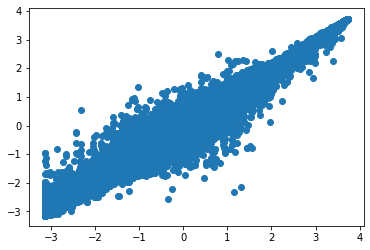

In [98]:
plt.scatter(y_test2,ypred_rf_rs2)

In [8]:
#random forest
# Leave one day out: method1
rf = RandomForestRegressor()

rf_loo1 = rf.fit(train_data, train_label)
ypred_rf_loo1=rf_loo1.predict(test_data) 
R2_rf_loo1=r2_score(test_label,ypred_rf_loo1)

/Users/dulichen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
R2_rf_loo1

0.5914031548398813

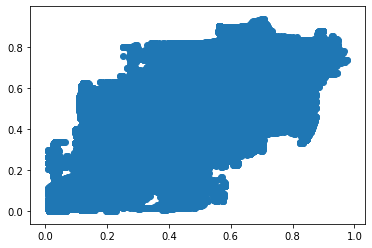

In [10]:
plt.scatter(test_label,ypred_rf_loo1)

In [9]:
#random forest
# Leave one day out: method2
rf = RandomForestRegressor()
rf_loo2 = rf.fit(train_data2, train_label2)
ypred_rf_loo2=rf_loo2.predict(test_data2) 
R2_rf_loo2=r2_score(test_label2,ypred_rf_loo2)

/Users/dulichen/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
R2_rf_loo2

0.5943114559027396

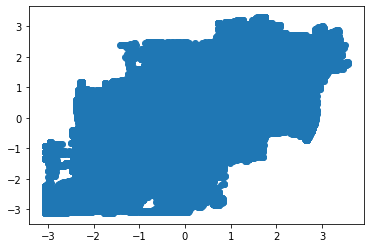

In [11]:
plt.scatter(test_label2,ypred_rf_loo2)

# Neural Network

In [65]:
def build_model(tr_x):    
    model = Sequential()
    #first layer with sample data input
    model.add(Dense(units=64, input_shape=(tr_x.shape[1],)))
    model.add(Dropout(0.2))
    #second layer
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.2))
    #third layer
    model.add(layers.Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    #forth layer
    model.add(layers.Dense(8, activation='relu'))
    #fifth layer
    model.add(layers.Dense(4, activation='relu'))
    #final layer and output the result
    model.add(Dense(units=1))
    #set the model loss function
    model.compile(optimizer= 'adam', loss="mse", metrics=['mae'])    
    return model



def train_whole(train_data, test_data, train_label, test_label):   
    model = build_model(train_data)
    
    rlst = EarlyStopping(monitor = 'val_loss', min_delta = .0001,
                         patience = 5, verbose = True, mode = 'min')    
    mod = model.fit(train_data, train_label , validation_data=(test_data, test_label), batch_size = 256, epochs=30,
                    callbacks = [rlst], verbose=1) 
    
    y_pred=model.predict(test_data)
    y_pred=y_pred.reshape([y_pred.shape[0],])
                          
    R2=r2_score(test_label,y_pred)
    test_mse_score, test_mae_score = model.evaluate(test_data, test_label)
    
    print("test_R2 is : "+str(R2))
    print("test_mse_score is : "+str(test_mse_score))
    print("test_rmse_score is : "+str(np.sqrt(test_mse_score)))
    print("test_mae_score is : "+str(test_mae_score))
    
    return (R2,test_mse_score, test_mae_score,y_pred)

In [82]:
#RS: method1
A=train_whole(X_train, X_test, y_train, y_test)

Train on 24772356 samples, validate on 8257452 samples
Epoch 1/30
24772356/24772356 [==============================] - 157s 6us/step - loss: 0.0082 - mae: 0.0700 - val_loss: 0.0076 - val_mae: 0.0680
Epoch 2/30
24772356/24772356 [==============================] - 145s 6us/step - loss: 0.0078 - mae: 0.0682 - val_loss: 0.0073 - val_mae: 0.0662
Epoch 3/30
24772356/24772356 [==============================] - 143s 6us/step - loss: 0.0078 - mae: 0.0679 - val_loss: 0.0070 - val_mae: 0.0647
Epoch 4/30
24772356/24772356 [==============================] - 143s 6us/step - loss: 0.0077 - mae: 0.0678 - val_loss: 0.0071 - val_mae: 0.0654
Epoch 5/30
24772356/24772356 [==============================] - 2249s 91us/step - loss: 0.0077 - mae: 0.0677 - val_loss: 0.0073 - val_mae: 0.0664
Epoch 6/30
24772356/24772356 [==============================] - 1629s 66us/step - loss: 0.0077 - mae: 0.0677 - val_loss: 0.0075 - val_mae: 0.0678
Epoch 7/30
24772356/24772356 [==============================] - 143s 6us/step

In [83]:
r2_nn_rs1=A[0] #0.6494140773649943
ypred_nn_rs1=A[3]

In [84]:
r2_nn_rs1

0.6703859939742833

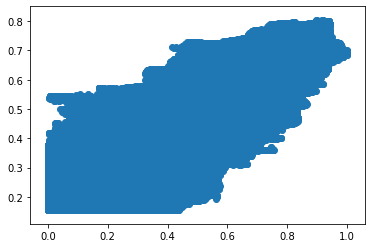

In [87]:
plt.scatter(y_test,ypred_nn_rs1)

In [79]:
#RS: method2
B=train_whole(X_train2, X_test2, y_train2, y_test2)

Train on 24772356 samples, validate on 8257452 samples
Epoch 1/30
24772356/24772356 [==============================] - 160s 6us/step - loss: 0.3709 - mae: 0.4696 - val_loss: 0.3429 - val_mae: 0.4565
Epoch 2/30
24772356/24772356 [==============================] - 148s 6us/step - loss: 0.3591 - mae: 0.4613 - val_loss: 0.3419 - val_mae: 0.4538
Epoch 3/30
24772356/24772356 [==============================] - 150s 6us/step - loss: 0.3567 - mae: 0.4596 - val_loss: 0.3421 - val_mae: 0.4547
Epoch 4/30
24772356/24772356 [==============================] - 147s 6us/step - loss: 0.3558 - mae: 0.4589 - val_loss: 0.3430 - val_mae: 0.4557
Epoch 5/30
24772356/24772356 [==============================] - 147s 6us/step - loss: 0.3552 - mae: 0.4586 - val_loss: 0.3297 - val_mae: 0.4455
Epoch 6/30
24772356/24772356 [==============================] - 148s 6us/step - loss: 0.3548 - mae: 0.4583 - val_loss: 0.3358 - val_mae: 0.4494
Epoch 7/30
24772356/24772356 [==============================] - 151s 6us/step - l

In [80]:
r2_nn_rs2=B[0]
ypred_nn_rs2=B[3]

In [88]:
r2_nn_rs2

0.6622417268840968

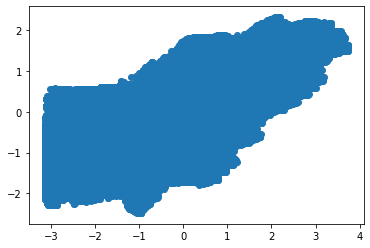

In [81]:
plt.scatter(y_test2,ypred_nn_rs2)

In [74]:
#LOO :method1
C=train_whole(train_data, test_data, train_label, test_label)

Train on 28311264 samples, validate on 4718544 samples
Epoch 1/30
28311264/28311264 [==============================] - 167s 6us/step - loss: 0.0083 - mae: 0.0699 - val_loss: 0.0107 - val_mae: 0.0811
Epoch 2/30
28311264/28311264 [==============================] - 176s 6us/step - loss: 0.0078 - mae: 0.0679 - val_loss: 0.0102 - val_mae: 0.0785
Epoch 3/30
28311264/28311264 [==============================] - 160s 6us/step - loss: 0.0077 - mae: 0.0676 - val_loss: 0.0098 - val_mae: 0.0768
Epoch 4/30
28311264/28311264 [==============================] - 157s 6us/step - loss: 0.0077 - mae: 0.0675 - val_loss: 0.0100 - val_mae: 0.0769
Epoch 5/30
28311264/28311264 [==============================] - 165s 6us/step - loss: 0.0077 - mae: 0.0674 - val_loss: 0.0104 - val_mae: 0.0784
Epoch 6/30
28311264/28311264 [==============================] - 168s 6us/step - loss: 0.0076 - mae: 0.0673 - val_loss: 0.0105 - val_mae: 0.0786
Epoch 7/30
28311264/28311264 [==============================] - 162s 6us/step - l

In [75]:
r2_nn_loo1=C[0]
ypred_nn_loo1=C[3]

In [76]:
r2_nn_loo1

0.3998783378706854

In [77]:
ypred_nn_loo1

array([0.4743681 , 0.4743681 , 0.4743681 , ..., 0.32673362, 0.32627702,
       0.3260374 ], dtype=float32)

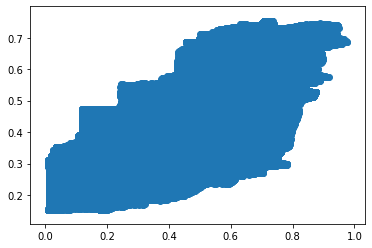

In [78]:
plt.scatter(test_label,ypred_nn_loo1)

In [69]:
#LOO :method2
D=train_whole(train_data2, test_data2, train_label2, test_label2)

Train on 28311264 samples, validate on 4718544 samples
Epoch 1/30
28311264/28311264 [==============================] - 178s 6us/step - loss: 0.3768 - mae: 0.4730 - val_loss: 0.3593 - val_mae: 0.4678
Epoch 2/30
28311264/28311264 [==============================] - 160s 6us/step - loss: 0.3634 - mae: 0.4638 - val_loss: 0.3697 - val_mae: 0.4756
Epoch 3/30
28311264/28311264 [==============================] - 163s 6us/step - loss: 0.3608 - mae: 0.4620 - val_loss: 0.3739 - val_mae: 0.4808
Epoch 4/30
28311264/28311264 [==============================] - 164s 6us/step - loss: 0.3596 - mae: 0.4611 - val_loss: 0.3755 - val_mae: 0.4779
Epoch 5/30
28311264/28311264 [==============================] - 174s 6us/step - loss: 0.3587 - mae: 0.4603 - val_loss: 0.3793 - val_mae: 0.4804
Epoch 6/30
28311264/28311264 [==============================] - 169s 6us/step - loss: 0.3581 - mae: 0.4599 - val_loss: 0.3820 - val_mae: 0.4805
Epoch 00006: early stopping
4718544/4718544 [==============================] - 39

In [70]:
r2_nn_loo2=D[0]
ypred_nn_loo2=D[3]

In [71]:
r2_nn_loo2

0.5947592403965638

In [72]:
ypred_nn_loo2

array([ 0.6937163 ,  0.693714  ,  0.6937088 , ..., -0.5774126 ,
       -0.57925296, -0.58276343], dtype=float32)

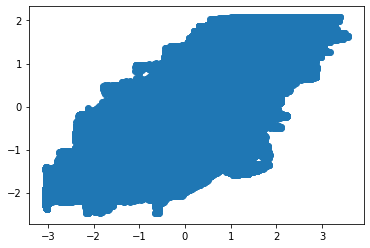

In [73]:
plt.scatter(test_label2,ypred_nn_loo2)